<a href="https://colab.research.google.com/github/Mahitab02/projects/blob/main/project_DM_(K_Means)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import needed libraries and take an object from them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
#load the data
Data=pd.read_csv("Ecommerce_data.csv")
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#print all information about the Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#getting the number of the missed values in the data using the following function
Data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
#we handle the problem of missing data by removind the row which contain the missing values 
#using dropna() function we drop the missing valus's rows
#then checking whether there are missing values or not again to make sure that we handle the problem of missing values
Data=Data.dropna()
Data.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#print information about the Data after remove missing values
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
#change type of column 'InvoiceDate' from object to datetime
#make column 'Description' his string to lower case
#change type of column 'CustomerID' from flout64 to object
Data['InvoiceDate']=pd.to_datetime(Data.InvoiceDate, format='%m/%d/%Y %H:%M')
Data['Description']=Data.Description.str.lower()
Data['CustomerID']=Data.CustomerID.astype('object')
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<AxesSubplot:>

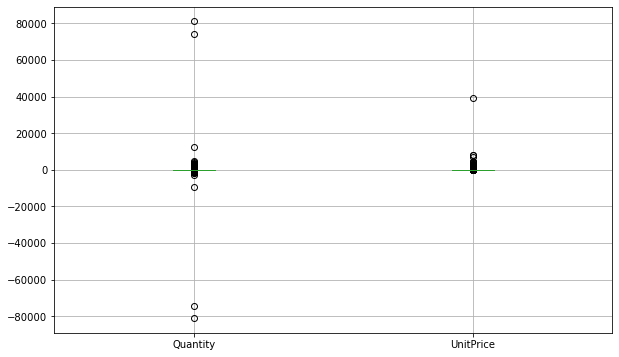

In [ ]:
#boxplot when data is noise
plt.figure(figsize = (10, 6))
Data.boxplot()

In [ ]:
#remove outliers from column 'Quantity'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them
for x in ['Quantity']:
    Q75,Q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan

In [ ]:
#sum all null vales in 'Quantity' column
Data.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity       26682
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
dtype: int64

In [ ]:
#drop all null values that we found in column 'Quantity'
Data = Data.dropna(axis = 0)

In [ ]:
#print information about the Data after remove null values that we found in 'Quantity' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380147 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    380147 non-null  object        
 1   StockCode    380147 non-null  object        
 2   Description  380147 non-null  object        
 3   Quantity     380147 non-null  float64       
 4   InvoiceDate  380147 non-null  datetime64[ns]
 5   UnitPrice    380147 non-null  float64       
 6   CustomerID   380147 non-null  object        
 7   Country      380147 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 26.1+ MB


In [ ]:
#remove outliers from column 'UnitPrice'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them
for y in ['UnitPrice']:
    Q75,Q25 = np.percentile(Data.loc[:,y],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[y] < min,y] = np.nan
    Data.loc[Data[y] > max,y] = np.nan

In [ ]:
#sum all null vales in 'UnitPrice' column
Data.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice      35754
CustomerID         0
Country            0
dtype: int64

In [ ]:
#drop all null values that we found in column 'UnitPrice'
Data = Data.dropna(axis = 0)

In [ ]:
#sum all null vales in 'UnitPrice' column to make sure that all null values are dropped
Data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#print information about the Data after remove null values that we found in 'UnitPrice' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344393 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    344393 non-null  object        
 1   StockCode    344393 non-null  object        
 2   Description  344393 non-null  object        
 3   Quantity     344393 non-null  float64       
 4   InvoiceDate  344393 non-null  datetime64[ns]
 5   UnitPrice    344393 non-null  float64       
 6   CustomerID   344393 non-null  object        
 7   Country      344393 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 23.6+ MB


<AxesSubplot:>

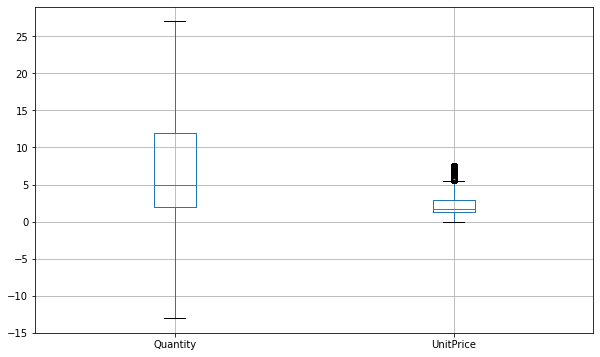

In [ ]:
#boxplot after cleaning the data from noise,null and remove outliers
plt.figure(figsize = (10, 6))
Data.boxplot()

In [ ]:
#show the duplicate
Data[Data.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,union jack flag luggage tag,1.0,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1.0,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,set 2 tea towels i love london,1.0,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,scottie dog hot water bottle,1.0,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,round snack boxes set of 4 skulls,1.0,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
#sum all duplicated data
Data.duplicated().sum()

4940

In [ ]:
#drop all duplicated data
Data.drop_duplicates(inplace=True)

In [ ]:
#sum all duplicate data to make sure that there is no duplication
Data.duplicated().sum()

0

In [ ]:
#we use describe() method to return description of the data in the DataFrame
Data.describe()

,Quantity,UnitPrice
count,339453.000000,339453.000000
mean,7.350022,2.203459
std,6.890369,1.549676
min,-13.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.650000
75%,12.000000,2.950000
max,27.000000,7.500000


In [ ]:
#this column don't related to our output(status)so we remove it
Data=Data.drop(columns="StockCode")
Data=Data.drop(columns="InvoiceNo")
Data=Data.drop(columns="InvoiceDate")
Data=Data.drop(columns="CustomerID")
Data

,Description,Quantity,UnitPrice,Country
0,white hanging heart t-light holder,6.0,2.55,United Kingdom
1,white metal lantern,6.0,3.39,United Kingdom
2,cream cupid hearts coat hanger,8.0,2.75,United Kingdom
3,knitted union flag hot water bottle,6.0,3.39,United Kingdom
4,red woolly hottie white heart.,6.0,3.39,United Kingdom
...,...,...,...,...
541904,pack of 20 spaceboy napkins,12.0,0.85,France
541905,children's apron dolly girl,6.0,2.10,France
541906,childrens cutlery dolly girl,4.0,4.15,France
541907,childrens cutlery circus parade,4.0,4.15,France


In [ ]:
#create a matrix filled with correlation values for each two columns
Data.corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.344021
UnitPrice,-0.344021,1.000000


In [ ]:
#create a matrix filled with correlation values for each two columns with absolute value
CorrelationMatrix = Data.corr().abs()
CorrelationMatrix

,Quantity,UnitPrice
Quantity,1.000000,0.344021
UnitPrice,0.344021,1.000000


In [ ]:
#Selecting the Upper triangular matrix
up_tri = CorrelationMatrix.where(np.triu(np.ones(CorrelationMatrix.shape),k=1).astype(np.bool))
up_tri

C:\Users\MCC\AppData\Local\Temp/ipykernel_3248/2541172571.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up_tri = CorrelationMatrix.where(np.triu(np.ones(CorrelationMatrix.shape),k=1).astype(np.bool))


,Quantity,UnitPrice
Quantity,NaN,0.344021
UnitPrice,NaN,NaN


In [ ]:
#this method help us to know which columns with high correlation that we will drop
C_drop = [column for column in up_tri.columns if any(up_tri[column] >= 0.8)]
print(C_drop)

[]


In [ ]:
#their is no corr >= 0.8 between columns so we will not drop columns
Data.head()

,Description,Quantity,UnitPrice,Country
0,white hanging heart t-light holder,6.0,2.55,United Kingdom
1,white metal lantern,6.0,3.39,United Kingdom
2,cream cupid hearts coat hanger,8.0,2.75,United Kingdom
3,knitted union flag hot water bottle,6.0,3.39,United Kingdom
4,red woolly hottie white heart.,6.0,3.39,United Kingdom


In [ ]:
#by using cut () function we do the discretization to each numerical attribute
#T_Quantity is the types of the Quantity which divided into 3 parts
Data['T_Quantity'] = pd.cut(Data['Quantity'],3,labels=['small','medium','larg'])

In [ ]:
#T_UnitPrice is the types of the Quantity which divided into 3 parts
Data['T_UnitPrice'] = pd.cut(Data['UnitPrice'],3,labels=['low','normal','great'])

In [ ]:
#final shape for the dataset after the preprocessing on it 
Data

,Description,Quantity,UnitPrice,Country,T_Quantity,T_UnitPrice
0,white hanging heart t-light holder,6.0,2.55,United Kingdom,medium,normal
1,white metal lantern,6.0,3.39,United Kingdom,medium,normal
2,cream cupid hearts coat hanger,8.0,2.75,United Kingdom,medium,normal
3,knitted union flag hot water bottle,6.0,3.39,United Kingdom,medium,normal
4,red woolly hottie white heart.,6.0,3.39,United Kingdom,medium,normal
...,...,...,...,...,...,...
541904,pack of 20 spaceboy napkins,12.0,0.85,France,medium,low
541905,children's apron dolly girl,6.0,2.10,France,medium,low
541906,childrens cutlery dolly girl,4.0,4.15,France,medium,normal
541907,childrens cutlery circus parade,4.0,4.15,France,medium,normal


In [ ]:
#encoding the Description,Country column from categorical data to numeric for the model to understand and put it in the datafarme
le = LabelEncoder()
le.fit(Data["Description"])
Data["Description"] = le.transform(Data["Description"])
le.fit(Data["Country"])
Data["Country"] = le.transform(Data["Country"])

In [ ]:
#select feature i want from Data
#Create KMeans Classifier, set number of clusters or centroids, random number generation for centroid initialization. 
#Use an int in (random_state) to make the randomness deterministic.
#we use Kmeans.fit(Data) to train our model in our data set that need to be Clustered.
Data = Data[['Description', 'Quantity', 'UnitPrice', 'Country']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(Data)
kmeans

KMeans(n_clusters=3, random_state=0)

In [ ]:
#Predict the closest cluster each sample in X belongs to
P_KM = kmeans.predict(Data)
P_KM

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#Coordinates of cluster centers 
Centroid = kmeans.cluster_centers_
print(Centroid)

[[2.92780934e+03 7.49903988e+00 2.17490696e+00 3.27464738e+01]
 [5.53764356e+02 7.12732066e+00 2.33352365e+00 3.29737583e+01]
 [1.73061742e+03 7.35655950e+00 2.13618892e+00 3.33643332e+01]]


In [ ]:
#Getting labels of each point using Kmeans.labels_ method
#Getting unique labels using np.unique(Labels)
Labels = kmeans.labels_
unique_Labels = np.unique(Labels)
unique_Labels

array([0, 1, 2])